In [ ]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs                                               
from cartopy.io import shapereader as shpreader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter

## 1.自2150BC以来的重大地震

In [2]:
#读取文件
Sig_Eqs=pd.read_csv('earthquakes-2022-10-26_16-51-28_+0800.tsv',skiprows=[1],sep='\t')

### 1.1 计算自2150BC以来每个国家因地震死亡的的总人数，并打印出来死亡人数最多的前20个国家

In [3]:
df1=Sig_Eqs.groupby('Country')['Deaths'].sum()# 对country进行聚类，并对每个country的Deaths求和
df2=df1.sort_values(ascending=False)[0:20]# 排序取前20
print(df2)

Country
CHINA           2075019.0
TURKEY          1134569.0
IRAN            1011446.0
ITALY            498477.0
SYRIA            439224.0
HAITI            323474.0
AZERBAIJAN       317219.0
JAPAN            278142.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135479.0
TURKMENISTAN     117412.0
PERU             102219.0
ISRAEL            90388.0
PORTUGAL          83531.0
GREECE            79174.0
CHILE             64276.0
INDIA             63491.0
TAIWAN            57135.0
Name: Deaths, dtype: float64


### 1.2 计算全球每年震级大于3的地震总次数，并画出时间序列。写观察到的趋势并解释。

<AxesSubplot:xlabel='Year'>

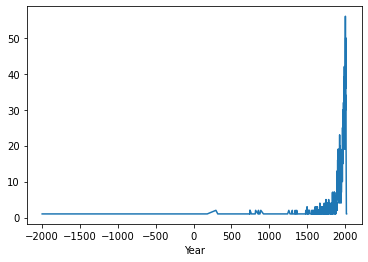

In [4]:
df3=Sig_Eqs[Sig_Eqs['Ms']>3]#先筛选出表面波Ms等级大于3的dataframe
df3.groupby('Year').size().plot()#对df3关于Year进行聚类。size返回每一类的计数，也就是每一年有多少次震级大于3的地震。最后画出时间序列。

##### 观察到的趋势：自1500年地震次数显著增加

### 1.3 写一个函数叫CountEq_LargestEq（1）给定一个国家AND，返回它自2150BC以来的的地震总次数。（2）该国家发生的最大一次地震的日期和地点。将这个函数用于每一个国家，并写出结果（降序）。

In [165]:
def CountEq_LargestEq(AND):
    global largest_location
    Eq_number=Sig_Eqs['Country'].str.contains(AND).sum()
    print(AND,'自2150BC以来的的地震次数为：',Eq_number,'次')
    Index_largest=Sig_Eqs[Sig_Eqs['Country'].str.contains(AND)==True].sort_values(['Mag','Mw','Mw', 'Ms', 'Mb', 'Ml'],ascending=False).index[0]#返回index
    largest_location=Sig_Eqs.loc[Index_largest]
    Year=largest_location['Year']
    Mo=largest_location['Mo']
    Dy=largest_location['Dy']
    Location_Name=largest_location['Location Name']##.replace(AND,'')
    print(AND,'曾发生的最大一次地震的日期为:',Year,'年',Mo,'月',Dy,'日','地点为',Location_Name)
CountEq_LargestEq('CHINA')

CHINA 自2150BC以来的的地震次数为： 616 次
CHINA 曾发生的最大一次地震的日期为: 1668 年 7.0 月 25.0 日 地点为 CHINA:  SHANDONG PROVINCE


In [166]:
All_country=Sig_Eqs['Country'].unique()
def result():
    new_df=[]
    for AND in All_country:
        CountEq_LargestEq(AND)
        new_df.append(largest_location)
    print(new_df)
result()

JORDAN 自2150BC以来的的地震次数为： 5 次
JORDAN 曾发生的最大一次地震的日期为: -2150 年 nan 月 nan 日 地点为 JORDAN:  BAB-A-DARAA,AL-KARAK
SYRIA 自2150BC以来的的地震次数为： 33 次
SYRIA 曾发生的最大一次地震的日期为: 1202 年 5.0 月 20.0 日 地点为 SYRIA:  SOUTHWESTERN
TURKMENISTAN 自2150BC以来的的地震次数为： 11 次
TURKMENISTAN 曾发生的最大一次地震的日期为: 1895 年 7.0 月 8.0 日 地点为 TURKMENISTAN:  UZUN-ADA
GREECE 自2150BC以来的的地震次数为： 271 次
GREECE 曾发生的最大一次地震的日期为: 365 年 7.0 月 21.0 日 地点为 GREECE:  CRETE:  KNOSSOS
ISRAEL 自2150BC以来的的地震次数为： 23 次
ISRAEL 曾发生的最大一次地震的日期为: -31 年 9.0 月 2.0 日 地点为 ISRAEL:  QUMRAN,ARIHA (JERICHO)
ITALY 自2150BC以来的的地震次数为： 331 次
ITALY 曾发生的最大一次地震的日期为: 1915 年 1.0 月 13.0 日 地点为 ITALY:  MARSICA, AVEZZANO, ABRUZZI
LEBANON 自2150BC以来的的地震次数为： 14 次
LEBANON 曾发生的最大一次地震的日期为: 551 年 7.0 月 9.0 日 地点为 LEBANON:  BAYRUT (BEIRUT); EGYPT; IRAQ;SAUDI ARABIA
IRAN 自2150BC以来的的地震次数为： 384 次
IRAN 曾发生的最大一次地震的日期为: 856 年 12.0 月 22.0 日 地点为 IRAN:  DAMGHAN, QUMIS
INDIA 自2150BC以来的的地震次数为： 102 次
INDIA 曾发生的最大一次地震的日期为: 1950 年 8.0 月 15.0 日 地点为 INDIA-CHINA
TURKEY 自2150BC以来的的地震次数为： 332 次
TURKEY 曾发生的最大一次地震的日期为:

## 2.过去25年深圳的空气温度

### 在这个习题集中，我们将利用在宝安国际机场测量的每小时天气数据来研究深圳在过去25年的气温变化。数据集来自NOAA综合地表数据集。下载文件Baoan_Weather_1998_2022.CSV，移动CSV文件到您的工作目录。阅读综合用户指南的第的10 - 11页(pos88 -92和pos93 -93)，以获得空气温度数据的详细格式(使用TMP列)。解释如何在报告中筛选数据。

### 用月平均气温与观测时间作图。过去25年的月平均气温有变化趋势吗?

In [9]:
#### 如何在报告中筛选数据呢？
####本题只用到TMP和DATA，其中这两列中的部分信息对于计算是无用的，可以通过正则进行匹配并返回匹配值，在这里我学习了一些正则表达式的语法
#### TMP 处理：从'+ABCD，X'中提取出'+ABCD'转化为int形式，并除以10,'X'，可以判断数据的数据的质量状态，可以提取出来看看都有什么类型的数据。
#### DATE 处理：从'年-月-日T小时：分钟：秒'中提取出'年-月-日'

In [160]:
Baoan_Weather=pd.read_csv('Baoan_Weather_1998_2022.csv',usecols=['DATE','TMP'])#读取文件

In [161]:
#使用apply()和lambda进行提取，并将提取的内容添加到新的列
Baoan_Weather['Ymd']= Baoan_Weather['DATE'].apply(lambda x:re.findall('(\d+-\d+)-\d+',x)[0])
Baoan_Weather['T_celsius']=Baoan_Weather['TMP'].apply(lambda x:re.findall('(.\d+).\d+',x)[0]).astype(int)/10
Baoan_Weather['T_type']=Baoan_Weather['TMP'].apply(lambda x:re.findall('.\d+.(\d+)',x)[0]).astype(int)

In [162]:
Baoan_Weather['T_type'].unique()## 有四种类型1,2,5,9，在本题当中我打算去除9：missing values
Baoan_Weather=Baoan_Weather.loc[Baoan_Weather['T_type']!=9]
Baoan_Weather=Baoan_Weather.drop(['T_type'],axis=1)#去除这一列，这样后面画图就不用选择画哪一列，可以直接画啦。

<AxesSubplot:xlabel='Ymd'>

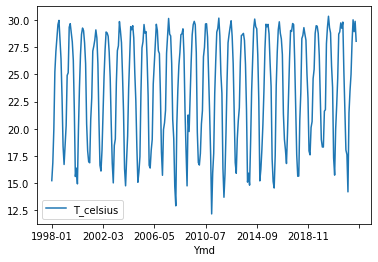

In [163]:
Baoan_Weather.groupby('Ymd').mean().plot()#对年进行聚类，求每一类的平均值后画图

## 3.Global collection of hurricanes

### The International Best Track Archive for Climate Stewardship (IBTrACS) project is the most complete global collection of tropical cyclones available. It merges recent and historical tropical cyclone data from multiple agencies to create a unified, publicly available, best-track dataset that improves inter-agency comparisons. IBTrACS was developed collaboratively with all the World Meteorological Organization (WMO) Regional Specialized Meteorological Centres, as well as other organizations and individuals from around the world.

### In this problem set, we will use all storms available in the IBTrACS record since 1842. Download the file ibtracs.ALL.list.v04r00.csv, move the .csv file to your working directory. Read Column Variable Descriptions for variables in the file. Examine the first few lines of the file.

### Below we provide an example to load the file as a pandas dataframe. Think about the options being used and why, and modify when necessary.

In [2]:
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=[' ','WMO_WIND','NOT_NAMED', 'NAME'])
df.head()
##运行这几行代码，我发现只读取了前17列，并且跳过了2和3行，设置'ISO_TIME'列为时间格式，并且我们把'WMO_WIND'中的空值‘’，'NAME'中的'NOT_NAMED',设置为缺失值

D:\anaconda3\envs\Python3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN,NaN,main,0,0.0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN,NaN,main,0,0.0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN,NaN,main,0,0.0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN,NaN,main,0,0.0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,NaN,NaN,NaN,main,0,0.0,__________P___


### 3.1 [5 points] Group the data on Storm Identifie (SID), report names (NAME) of the 10 largest hurricanes according to wind speed (WMO_WIND).

In [15]:
#是先对SID 进行聚类，求每一类当中WMO_WIND的最大值，并返回最大值的名字吗
headhur=df.groupby(['SID','NAME'])['WMO_WIND'].max().sort_values(ascending=False)
headhur.head(10)

SID            NAME    
2015293N13266  PATRICIA    185.0
1980214N11330  ALLEN       165.0
1988253N12306  GILBERT     160.0
2005289N18282  WILMA       160.0
1997253N12255  LINDA       160.0
2019236N10314  DORIAN      160.0
2009288N07267  RICK        155.0
2017242N16333  IRMA        155.0
2005261N21290  RITA        155.0
1998295N12284  MITCH       155.0
Name: WMO_WIND, dtype: float64

### 3.2 [5 points] Make a bar chart of the wind speed (WMO_WIND) of the 20 strongest-wind hurricanes.

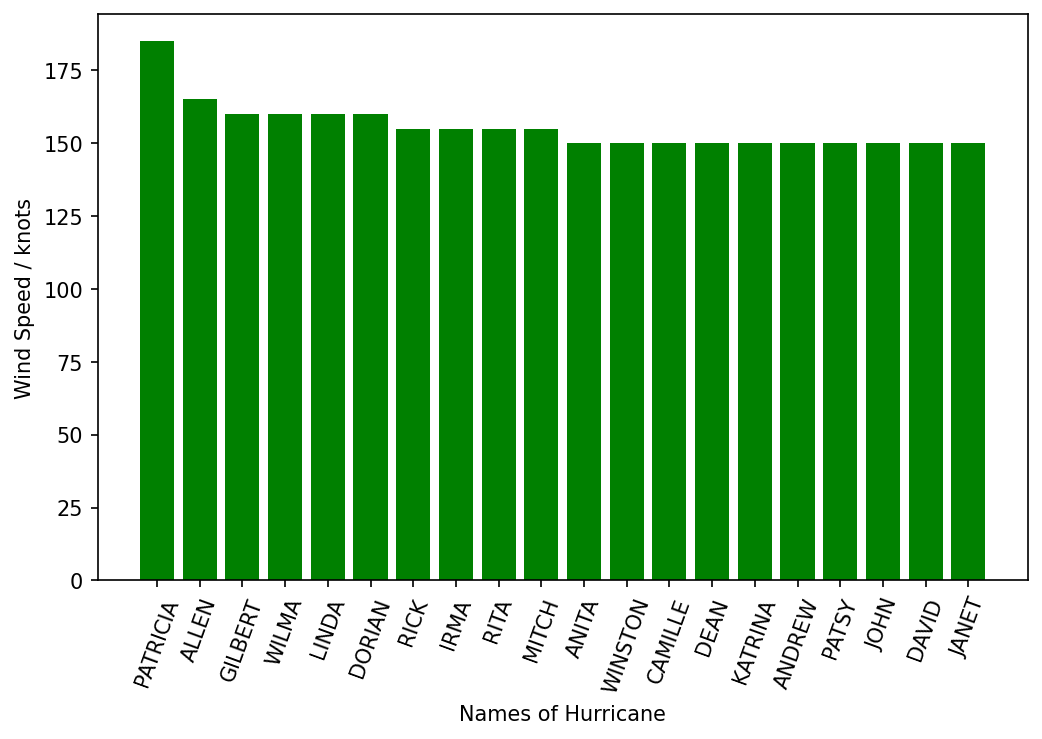

In [16]:
headhur= headhur.reset_index()
headhur20=headhur.head(20)
fig, ax = plt.subplots(figsize=(8,5),dpi=150)
ax.bar(headhur20['NAME'],headhur20['WMO_WIND'],color = 'g')
ax.set_xlabel('Names of Hurricane')
ax.set_ylabel('Wind Speed / knots')
ax.xaxis.set_tick_params(rotation=70)

### 3.3 [5 points] Plot the count of all datapoints by Basin as a bar chart.

Text(0, 0.5, 'BASIN_NUMBER')

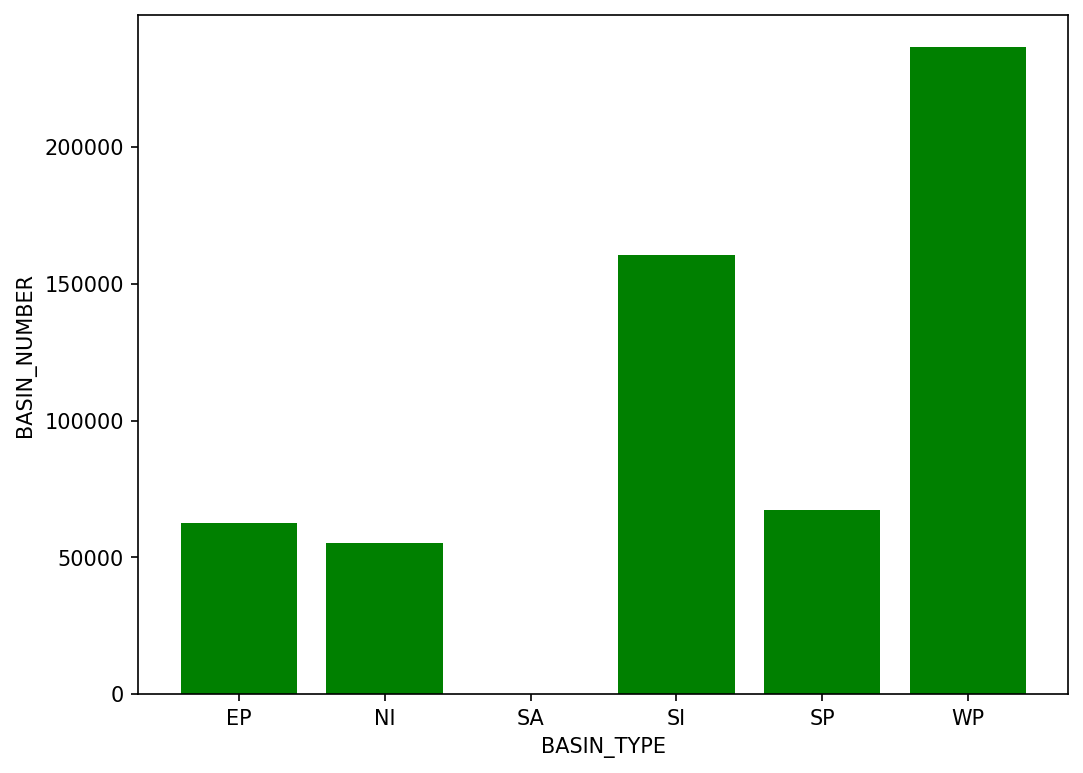

In [17]:
BASIN_NUMBER = df.groupby(['BASIN']).count()
fig, ax = plt.subplots(figsize=(8,6),dpi=150)
ax.bar(BASIN_NUMBER.index,BASIN_NUMBER['SID'],color='g')
ax.set_xlabel('BASIN_TYPE')
ax.set_ylabel('BASIN_NUMBER')

### 3.4 [5 points] Make a hexbin plot of the location of datapoints in Latitude and Longitude.

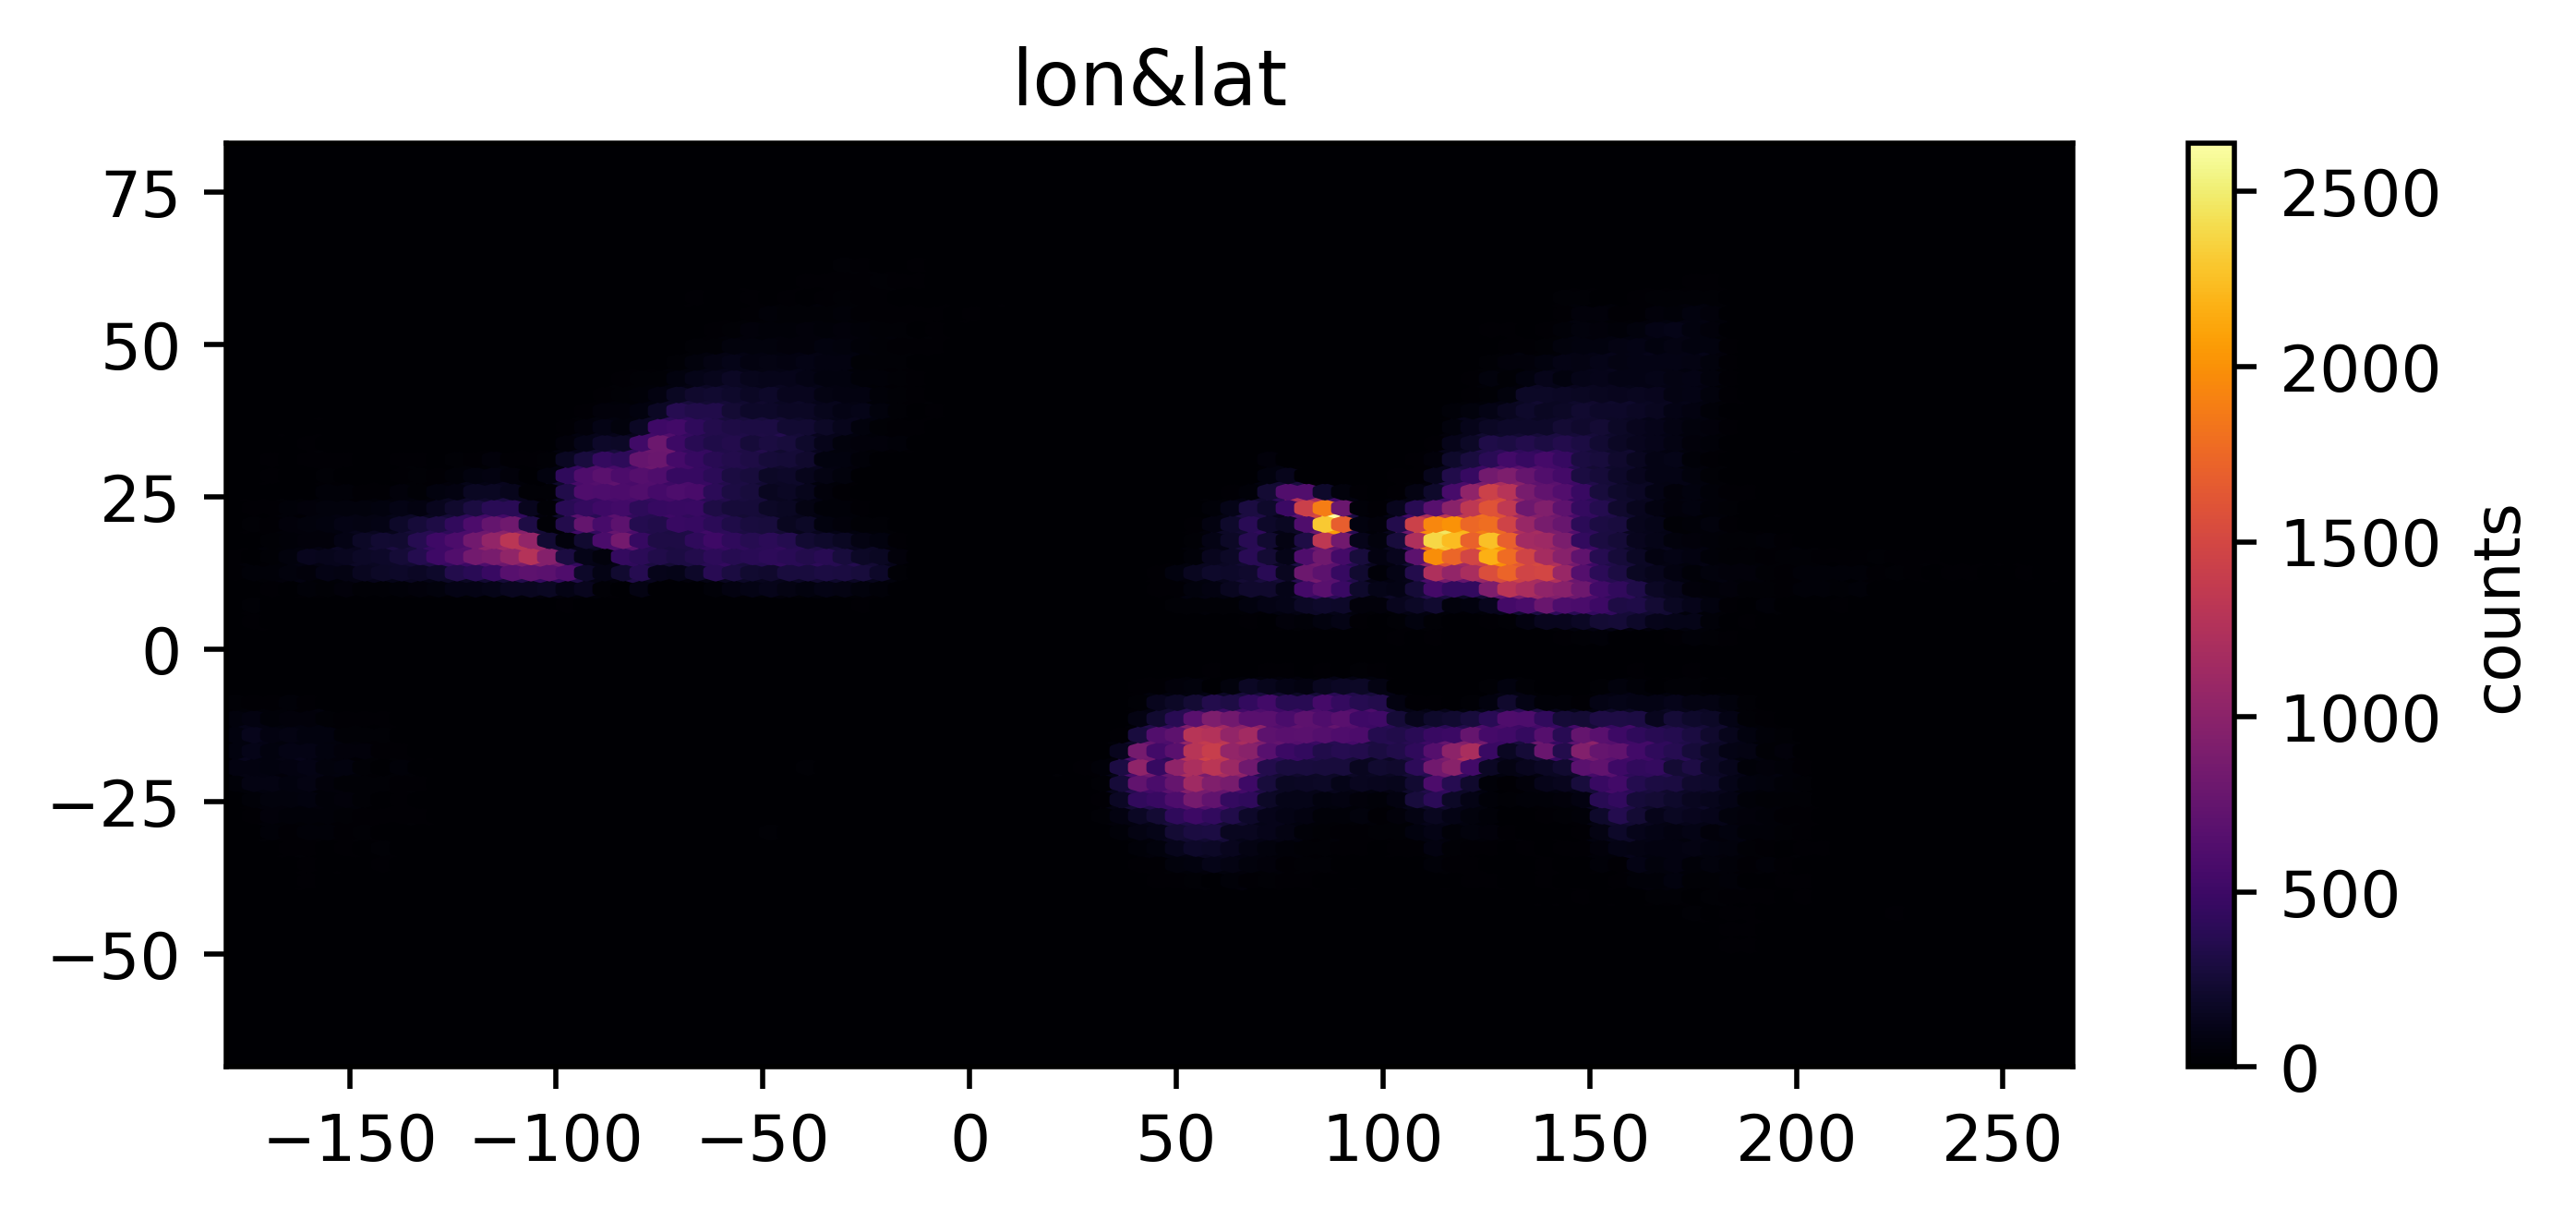

In [18]:
x = df['LON']
y = df['LAT']
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()
fig=plt.figure(figsize=(5,2),dpi=500)#添加画布
ax1=fig.add_axes([0,0,1,1])#添加子图
hb = ax1.hexbin(x, y, cmap='inferno')
ax1.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax1.set_title("lon&lat")
cb = fig.colorbar(hb, ax=ax1)
cb.set_label('counts')
plt.show()

### 3.5 [5 points] Find Typhoon Mangkhut (from 2018) and plot its track as a scatter plot.

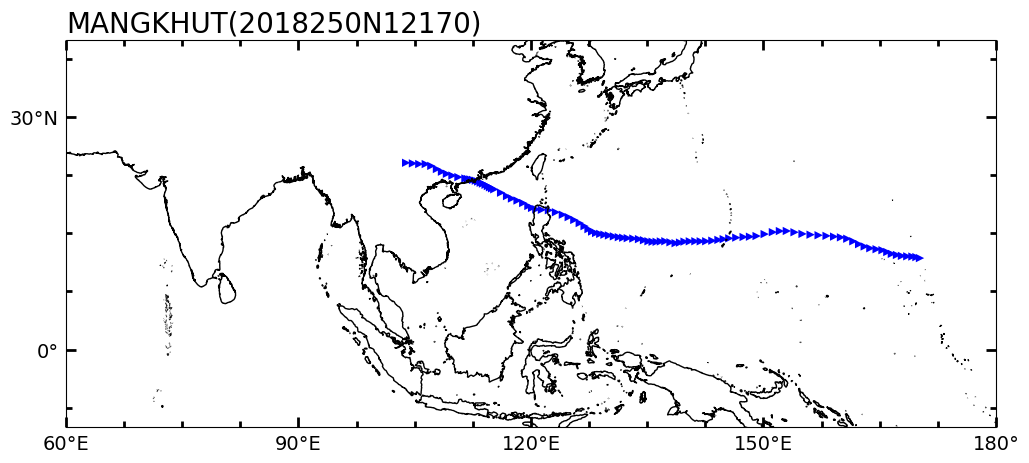

In [4]:
mangkhut  =  df.loc[df['NAME'] == 'MANGKHUT']
mangkhut  =  df.loc[df['SID'] == '2018250N12170']
lon  = mangkhut['LON']
lat  = mangkhut['LAT']
time = mangkhut['ISO_TIME']
fig,ax7=plt.subplots(figsize=(12,20),nrows=1,ncols=1,subplot_kw=dict(projection=ccrs.PlateCarree()))
plt.subplots_adjust(wspace=0.18,hspace=0.18)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
shape_feature_1=ShapelyFeature(shpreader.Reader('10m_coastline.shp').geometries(),ccrs.PlateCarree(),edgecolor='k',facecolor='none')
ax7.set_adjustable(adjustable='box',share=True)
ax7.set_xticks([-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180])                     
ax7.set_yticks([-90,-60,-30,0,30,60,90])
ax7.xaxis.set_major_formatter(LongitudeFormatter())                    
ax7.yaxis.set_major_formatter(LatitudeFormatter())
ax7.tick_params(axis='both',which='major',labelsize=14,length=7,width=2,pad=5,top=True,right=True)
ax7.minorticks_on()
ax7.tick_params(axis='both',which='minor',length=4,width=2,top=True,right=True)
cd1=ax7.scatter(lon,lat,transform=ccrs.PlateCarree(),marker = '>',linewidth=0.01,linestyle=':', color='b')
ax7.set_title('MANGKHUT(2018250N12170)',loc='left',fontsize =20)
ax7.add_feature(shape_feature_1)
plt.grid(False)
plt.xlim(60,180)    
plt.ylim(-10,40)    
plt.show()

### 3.6 [5 points] Create a filtered dataframe that contains only data since 1970 from the Western North Pacific (“WP”) and Eastern North Pacific (“EP”) Basin. Use this for the rest of the problem set.

In [30]:
data=  df.loc[(df['SEASON'] >= 1970)&((df['BASIN'] == 'WP') | (df['BASIN'] == 'EP'))]
data.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006.0,tokyo,main,1088,1088.0,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,NaN,NaN,main,1109,1109.0,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002.0,tokyo,main,1143,1143.0,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,NaN,NaN,main,1171,1168.0,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998.0,tokyo,main,1182,1179.0,_OO___________


### 3.7 [5 points] Plot the number of datapoints per day.

In [61]:
e = data['ISO_TIME'].dt.date
result1 = e.value_counts(sort = False)

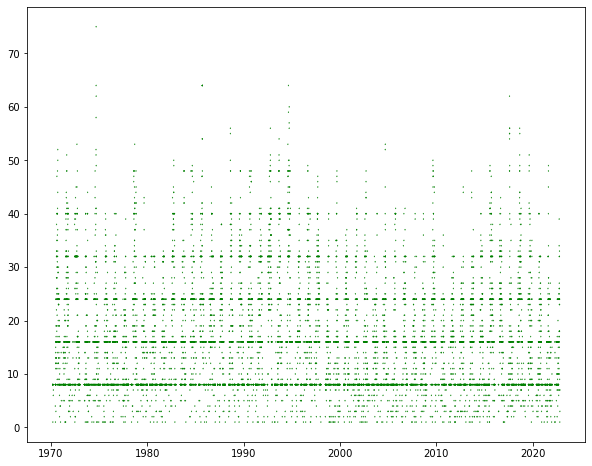

In [62]:
fig,ax1=plt.subplots(figsize=(10,8))
ax1.scatter(result1.index,result1,s=0.5, color = 'g',linewidth=1,linestyle=':')

### 3.8 [5 points] Calculate the climatology of datapoint counts as a function of day of year. The day of year is the sequential day number starting with day 1 on January 1st.

In [65]:
f = data['ISO_TIME'].dt.strftime('%m-%d')# %m 十进制表示的月份 %d 十进制表示的每月的第几天
result2 = f.value_counts(sort = False)
result2 

02-19    52
02-20    48
02-21    43
02-22    33
02-23    27
         ..
02-16    33
02-17    38
02-18    50
02-11    24
02-12    21
Name: ISO_TIME, Length: 366, dtype: int64

C:\Users\nicol\AppData\Local\Temp\ipykernel_11152\1767751263.py:3: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


([], [])

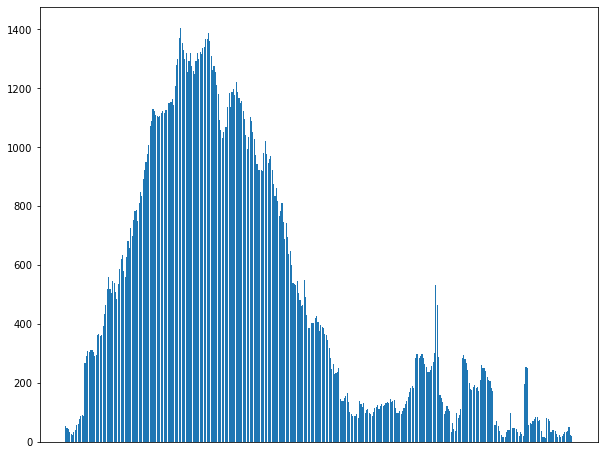

In [66]:
fig,ax1=plt.subplots(figsize=(10,8))
ax1.bar(result2.index,result2)
plt.xticks([])

### 3.9 [5 points] Calculate the anomaly of daily counts from the climatology.

In [ ]:
#不会

### 3.10 [5 points] Resample the anomaly timeseries at annual resolution and plot. So which years stand out as having anomalous hurricane activity?

In [46]:
g = pd.DatetimeIndex(data['ISO_TIME']).year

In [47]:
result3= g.value_counts(sort = False)
from sklearn  import  preprocessing
z = preprocessing.scale(result3)#将序列标准化

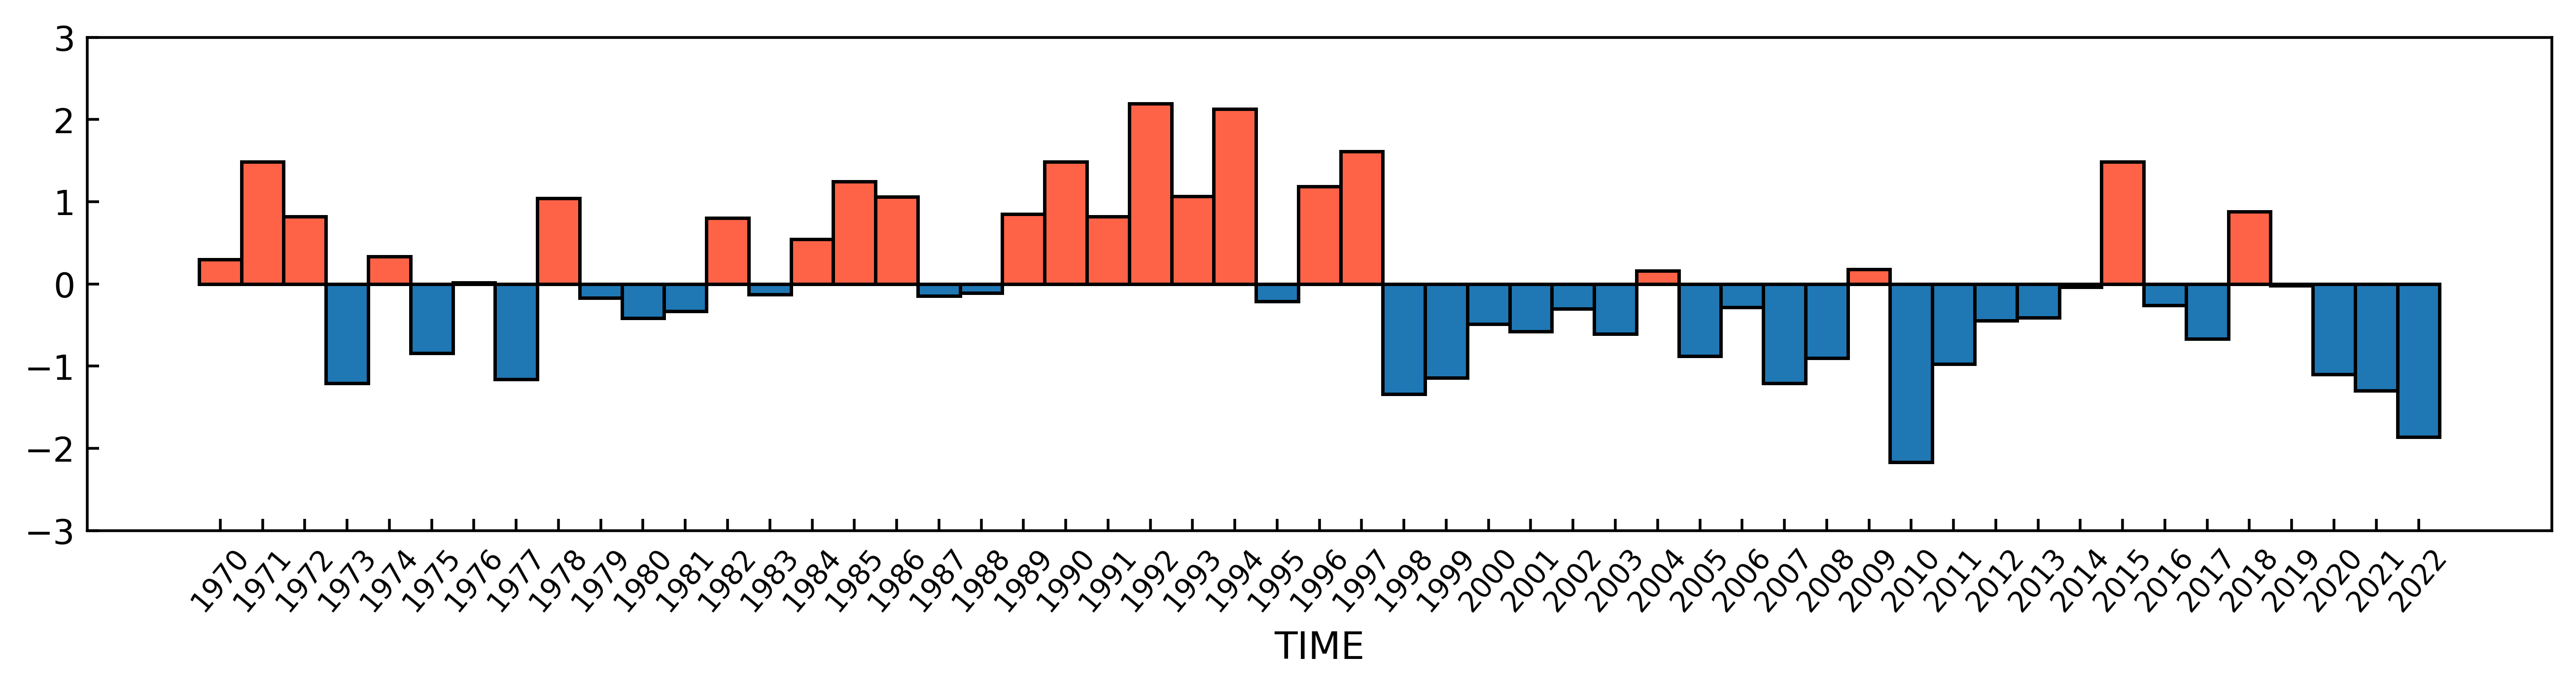

In [49]:
fig=plt.figure(figsize=(10,2),dpi=500)
ax1=fig.add_axes([0,0,1,1])
x=range(53)
bar1 = ax1.bar(x,z,color=np.where(z>0,'tomato','tab:blue'),edgecolor='k',width=1)
ax1.set_ylim(-3,3)
ax1.tick_params(axis='both',which='both',direction='in')
ax1.tick_params(axis='both',which='both',direction='in')
ax1.set_xticks(x)
ax1.set_xticklabels(result3.index ,rotation = 50,fontsize = 'small')
ax1.set_xlabel('TIME',fontsize=11)
plt.show()

In [50]:
print('异常的年份为：')
for i in range(53):
    if(z[i]<=-1 or z[i]>=1):
        print("             ",result3.index[i])

异常的年份为：
              1971
              1973
              1977
              1978
              1985
              1986
              1990
              1992
              1993
              1994
              1996
              1997
              1998
              1999
              2007
              2010
              2015
              2020
              2021
              2022


## 4. Explore a data set

### Browse the National Centers for Environmental Information (NCEI) or Advanced Global Atmospheric Gases Experiment (AGAGE) website. Search and download a data set you are interested in. You are also welcome to use data from your group in this problem set. But the data set should be in csv, XLS, or XLSX format, and have temporal information.

In [ ]:
#这个数据集是2018年某污水处理厂的进水流量和水质数据，一共339天的数据。
#没时间做了，作业可太多了，又多又难。

### 4.1 [5 points] Load the csv, XLS, or XLSX file, and clean possible data points with missing values or bad quality.

In [21]:
#读取文件
import pandas as pd
data = pd.read_csv("data1.csv",encoding='gbk')
data.head()

,Date,Day,TSS,CBOD5,TKN,NH3,Nitrates/Nitrites,ALK,Flow_ST,Flow_NT
0,01/01/2018 00:35,1,224,130,38.0,34.6,0.02,NaN,38908.1611,43608.16076
1,01/02/2018 00:25,2,98,100,39.8,34.0,0.02,NaN,38908.1611,43608.16076
2,01/03/2018 00:30,3,230,160,45.6,34.0,0.02,NaN,39270.35305,46488.81711
3,01/04/2018 00:30,4,202,89,44.3,32.4,0.02,NaN,38728.58436,49848.70029
4,01/05/2018 00:30,5,226,110,42.3,32.9,0.02,NaN,38492.4672,48197.44245


In [22]:

data['Date'] =pd.to_datetime(data['Date'])
data.head()
data['m']=data['Date'].dt.month

In [23]:
#，碱度一列是空值，但是不打算分析碱度，所以我打算去除这一列。对于水质我们更关心COD的浓度，列表中给了BOD浓度，我打算再添加一列COD浓度。
#data=data.drop(['ALK'],axis=1)
data['TCOD']=data['CBOD5']*2.1
data.head()

,Date,Day,TSS,CBOD5,TKN,NH3,Nitrates/Nitrites,ALK,Flow_ST,Flow_NT,m,TCOD
0,2018-01-01 00:35:00,1,224,130,38.0,34.6,0.02,NaN,38908.1611,43608.16076,1,273.0
1,2018-01-02 00:25:00,2,98,100,39.8,34.0,0.02,NaN,38908.1611,43608.16076,1,210.0
2,2018-01-03 00:30:00,3,230,160,45.6,34.0,0.02,NaN,39270.35305,46488.81711,1,336.0
3,2018-01-04 00:30:00,4,202,89,44.3,32.4,0.02,NaN,38728.58436,49848.70029,1,186.9
4,2018-01-05 00:30:00,5,226,110,42.3,32.9,0.02,NaN,38492.4672,48197.44245,1,231.0


### 4.2 [5 points] Plot the time series of a certain variable.

<function matplotlib.pyplot.show(close=None, block=None)>

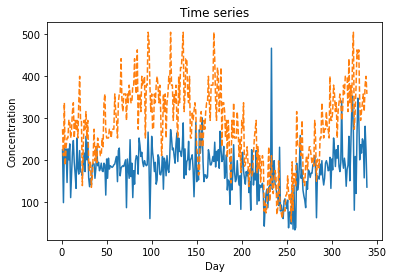

In [24]:
plt.plot(data['Day'],data['TSS'])
plt.plot(data['Day'],data['TCOD'],ls='--')
plt.title('Time series')#设置标题
plt.ylabel('Concentration')#设置y轴坐标名称
plt.xlabel('Day')#设置y轴坐标名称
plt.show

### 4.3 [5 points] Conduct at least 5 simple statistical checks with the variable, and report your findings.



C:\Users\nicol\AppData\Local\Temp\ipykernel_15952\1945591314.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M=data.groupby('m')['TCOD','TSS'].mean().plot() #求每月进水TSS,TCOD的平均值,并画图


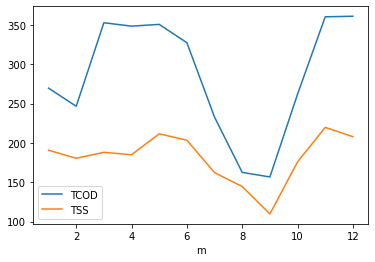

In [25]:
M=data.groupby('m')['TCOD','TSS'].mean().plot() #求每月进水TSS,TCOD的平均值,并画图

In [32]:
#由于有的月份的数据少，有的月份的数据多，我打算看看每一个月的数据量各是多少
M=data.groupby('m')['Day'].count()
M

m
1     31
2     28
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12     5
Name: Day, dtype: int64

In [ ]:
#没时间做了，现就这样吧